# **FEATURE MATCHING**

We'e talked about template matching, but it required an exact copy of the image. This isn't useful for real world applications.

Feature matching extracts defining key features from an input image (using ideas from corner, edge, and contour detection).

Then using a distance calculation, finds all the matches in a secondary image. This means we are no longer required to have an exact copy of the target image.

There are three methods to do this:
* Brute-Force matching with ORB descriptors
* Brute-Force matching with SIFT descriptors and Ratio test
* FLANN based matcher

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

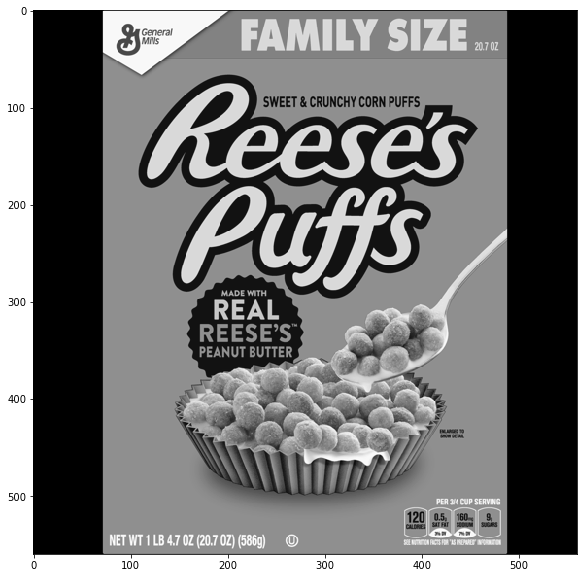

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)
# This is the image we'll try to find in the target image

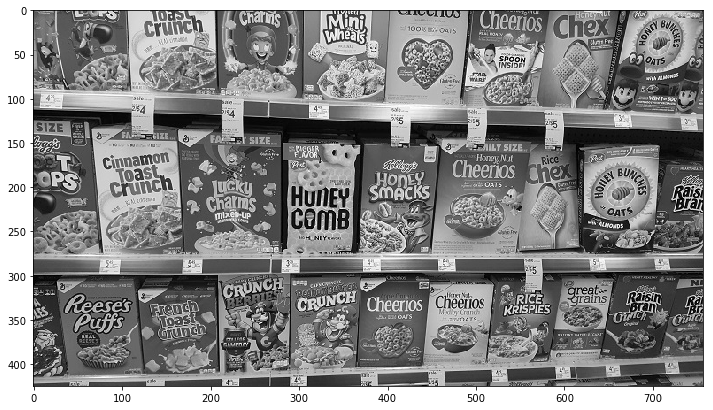

In [4]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)
# this image contains reese's puff's box
# we will try to identify reese's puff in the image

In [5]:
#calling brute force detection

orb = cv2.ORB_create() # we have created a detector object through which we can call multiple methods
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
# detectAndCompute returns two things, key points and descriptors

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [7]:
matches = bf.match(des1, des2)

In [8]:
matches
#these have multiple attributes. we need to get their distances

[<DMatch 000002308FB70DB0>,
 <DMatch 000002308FB70630>,
 <DMatch 000002308FB700F0>,
 <DMatch 000002308FB707D0>,
 <DMatch 000002308FB70850>,
 <DMatch 000002308FB70D50>,
 <DMatch 000002308FB70990>,
 <DMatch 000002308FB70810>,
 <DMatch 000002308FBB50B0>,
 <DMatch 000002308FBB5130>,
 <DMatch 000002308FBB5150>,
 <DMatch 000002308FBB5170>,
 <DMatch 000002308FBB5190>,
 <DMatch 000002308FBB51B0>,
 <DMatch 000002308FBB51D0>,
 <DMatch 000002308FBB51F0>,
 <DMatch 000002308FBB5210>,
 <DMatch 000002308FBB5230>,
 <DMatch 000002308FBB5250>,
 <DMatch 000002308FBB5270>,
 <DMatch 000002308FBB5290>,
 <DMatch 000002308FBB52B0>,
 <DMatch 000002308FBB52D0>,
 <DMatch 000002308FBB52F0>,
 <DMatch 000002308FBB5310>,
 <DMatch 000002308FBB5330>,
 <DMatch 000002308FBB5350>,
 <DMatch 000002308FBB5370>,
 <DMatch 000002308FBB5390>,
 <DMatch 000002308FBB53B0>,
 <DMatch 000002308FBB53D0>,
 <DMatch 000002308FBB53F0>,
 <DMatch 000002308FBB5410>,
 <DMatch 000002308FBB5430>,
 <DMatch 000002308FBB5450>,
 <DMatch 000002308FB

In [9]:
matches = sorted(matches, key=lambda x:x.distance)

In [10]:
len(matches)

263

In [11]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[::25], None, flags=2)
# we are just accessing 25 matches out of 263

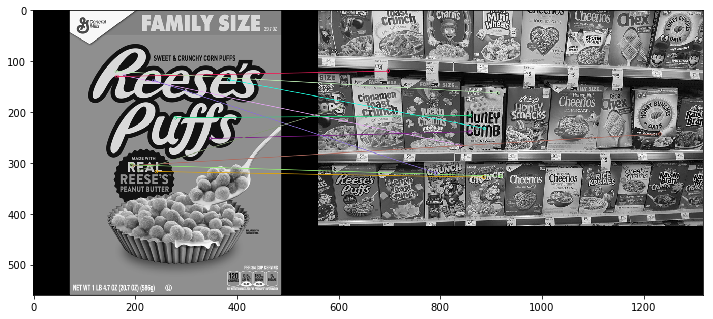

In [12]:
display(reeses_matches)

**Conclusion:** Brute Force matching doesn't really work

## Scale Invariant Feature Transform (SIFT) Descriptors:

In [13]:
sift = cv2.xfeatures2d.SIFT_create() #sift object similiar to orb object

In [14]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [15]:
bf = cv2.BFMatcher()

In [16]:
matches = bf.knnMatch(des1, des2, k=2) # k = 2 means we want to find the top 2 matches

In [17]:
matches #values are in pairs

[[<DMatch 000002308FE98530>, <DMatch 000002308FE98310>],
 [<DMatch 000002308FE980F0>, <DMatch 000002308FE986F0>],
 [<DMatch 000002308FE986B0>, <DMatch 000002308FE98650>],
 [<DMatch 000002308FE98A70>, <DMatch 000002308FE98730>],
 [<DMatch 000002308FE98B90>, <DMatch 000002308FE98AD0>],
 [<DMatch 000002308FE98BB0>, <DMatch 000002308FE98BD0>],
 [<DMatch 000002308FE98BF0>, <DMatch 000002308FE98C10>],
 [<DMatch 000002308FE98C30>, <DMatch 000002308FE98C50>],
 [<DMatch 000002308FE98C70>, <DMatch 000002308FE98C90>],
 [<DMatch 000002308FE98CB0>, <DMatch 000002308FE98CD0>],
 [<DMatch 000002308FE98CF0>, <DMatch 000002308FE98D10>],
 [<DMatch 000002308FE98D30>, <DMatch 000002308FE98D50>],
 [<DMatch 000002308FE98D70>, <DMatch 000002308FE98D90>],
 [<DMatch 000002308FE98DB0>, <DMatch 000002308FE98DD0>],
 [<DMatch 000002308FE98DF0>, <DMatch 000002308FE98E10>],
 [<DMatch 000002308FE98E30>, <DMatch 000002308FE98E50>],
 [<DMatch 000002308FE98E70>, <DMatch 000002308FE98E90>],
 [<DMatch 000002308FE98EB0>, <D

In [18]:
good = []

#ratio test 
#less distance = better match
for match1, match2 in matches:
    # if match1 distance is less than 75% of match2 distance
    #then descriptor was a good match, let's keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [19]:
good

[[<DMatch 000002308FBCC6F0>],
 [<DMatch 000002308FBCCCB0>],
 [<DMatch 000002308FBCCCF0>],
 [<DMatch 000002308FBCCEF0>],
 [<DMatch 000002308FBCE530>],
 [<DMatch 000002308FBCE830>],
 [<DMatch 000002308FBCE9B0>],
 [<DMatch 000002308FBCED30>],
 [<DMatch 000002308FBCEF70>],
 [<DMatch 000002308FEA1370>],
 [<DMatch 000002308FEA1470>],
 [<DMatch 000002308FEDC730>],
 [<DMatch 000002308FEDC770>],
 [<DMatch 000002308FEDC870>],
 [<DMatch 000002308FEDF630>],
 [<DMatch 000002308FEDFFB0>],
 [<DMatch 000002308FEE10B0>],
 [<DMatch 000002308FEE1170>],
 [<DMatch 000002308FEE19F0>],
 [<DMatch 000002308FEE1B30>],
 [<DMatch 000002308FEE3C70>],
 [<DMatch 000002308FEE3DB0>],
 [<DMatch 000002308FEE3DF0>],
 [<DMatch 000002308FEE3FB0>],
 [<DMatch 000002308FEE5030>],
 [<DMatch 000002308FEE8270>],
 [<DMatch 000002308FEE83F0>],
 [<DMatch 000002308FEE8430>],
 [<DMatch 000002308FEE89F0>],
 [<DMatch 000002308FEE8AF0>],
 [<DMatch 000002308FEE8BB0>],
 [<DMatch 000002308FEEA1B0>],
 [<DMatch 000002308FEEA530>],
 [<DMatch 

In [20]:
len(matches)

1500

In [21]:
len(good) #we have tossed away many bad matches

78

In [22]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

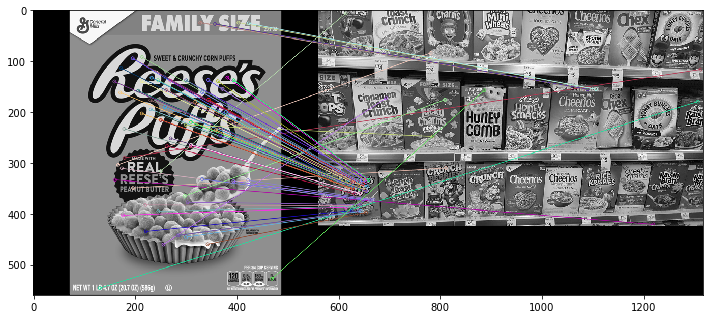

In [23]:
display(sift_matches)

## FLANN based matcher

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

In [26]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

FLANN --> Fast Library for Approximate Nearest Neighbours

In [27]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

FLANN is faster than Brute force method, but it does not find best possible matches, instead it will just find good general matches.

In [29]:
# FLANN
FLANN_INDEX_KDTREE=0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [30]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [34]:
matches = flann.knnMatch(des1, des2, k=2)

In [35]:
matchesMask = [[0,0] for i in range(len(matches))]

In [36]:
for i, (match1, match2) in enumerate(matches):

    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

In [37]:
draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0),matchesMask=matchesMask, flags=0)

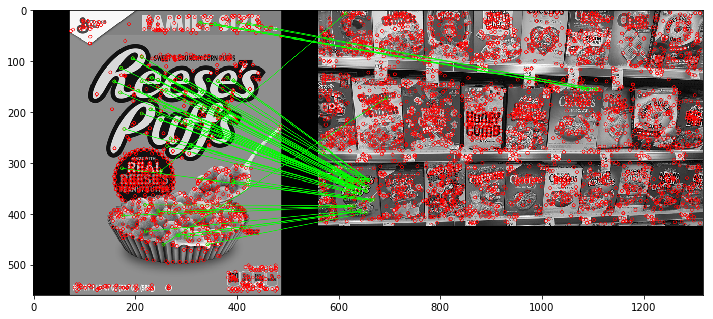

In [38]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)